In [18]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Flatten, BatchNormalization, Conv2D, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

In [19]:
train_path = "dogs-vs-cats/test1.zip"
test_path = "dogs-vs-cats/train.zip"

files = "kaggle/working/"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)

with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

In [20]:
image_dir = "kaggle/working/train/"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [21]:
labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state=42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state=42)

print('The shape of train data', X_train.shape)
print('The shape of test data', X_test.shape)
print('The shape of validation data', X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


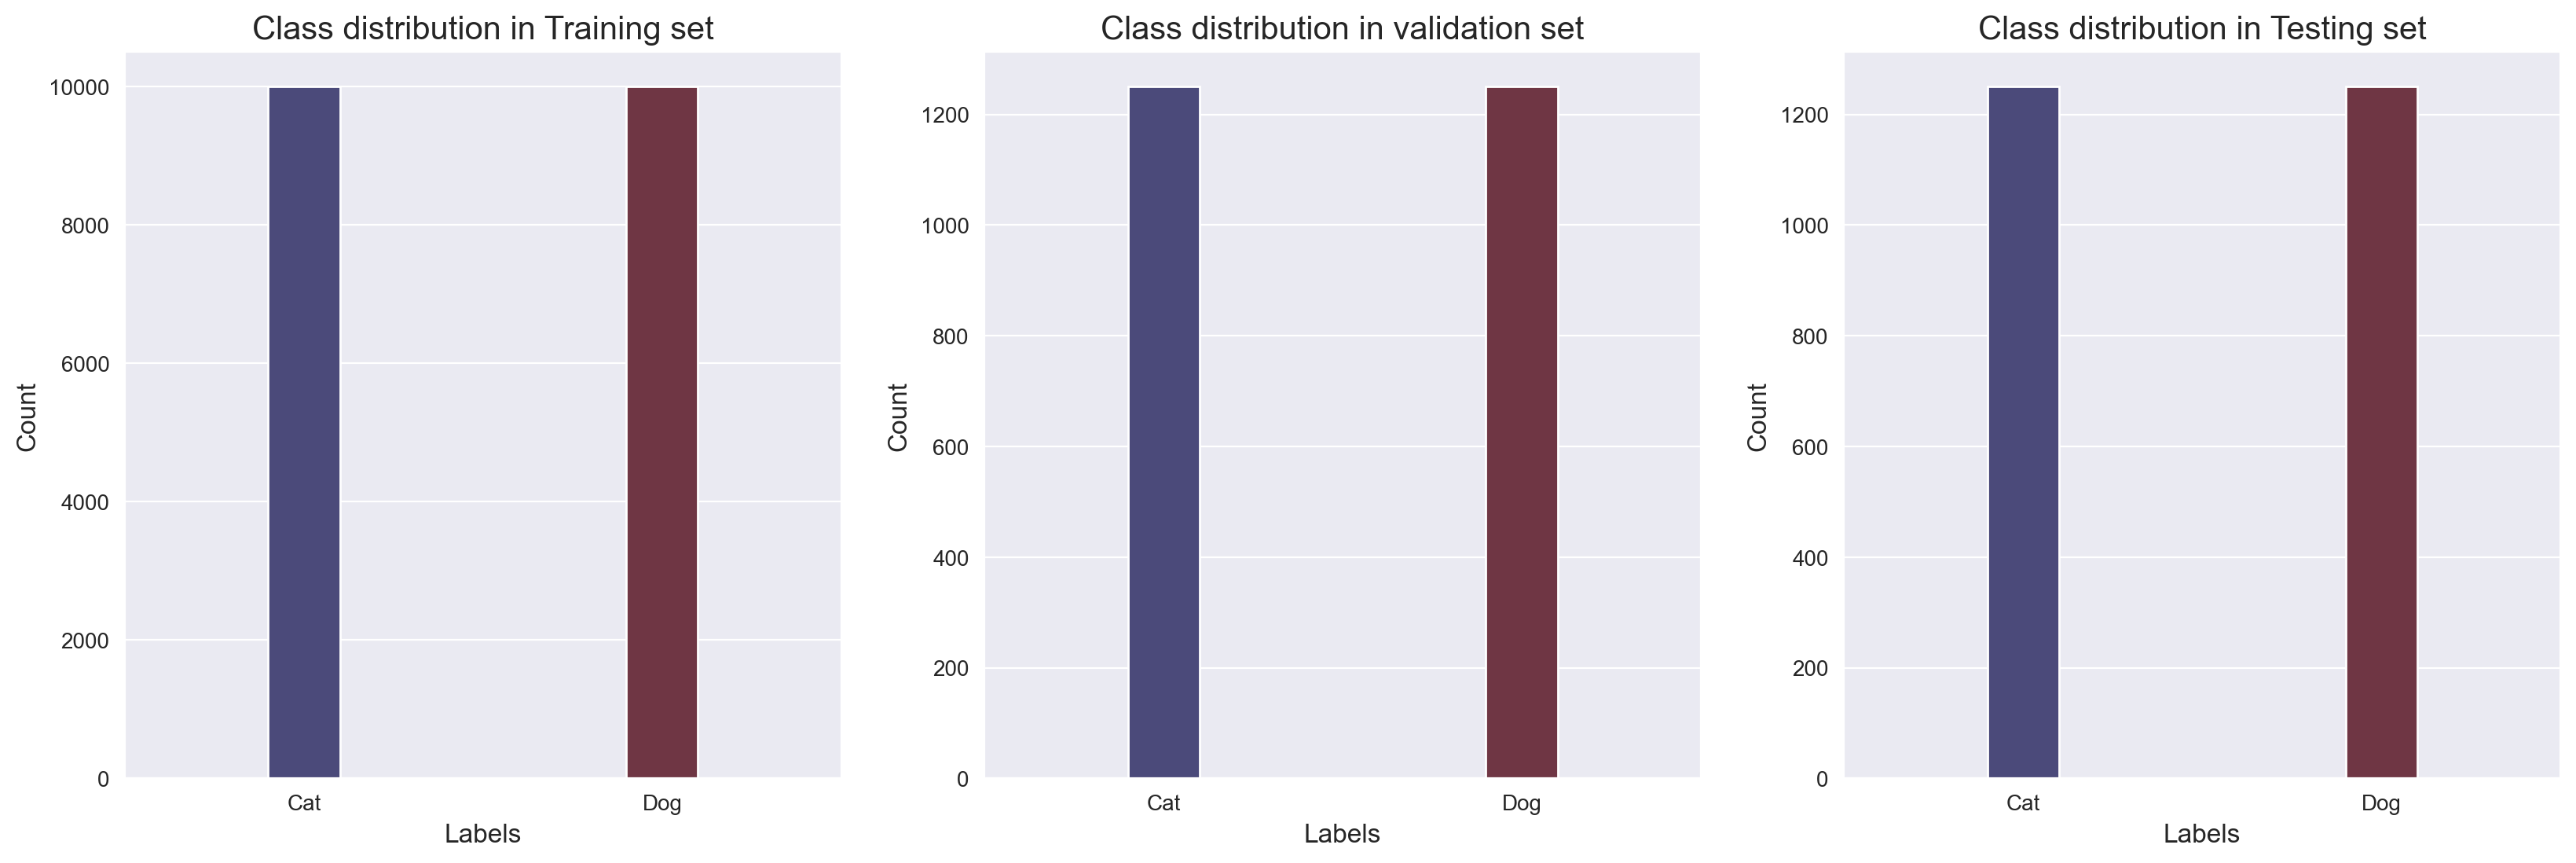

In [22]:
labels = ['Cat', 'Dog']

label1, count1 = np.unique(X_train.label, return_counts=True)
label2, count2 = np.unique(X_val.label, return_counts=True)
label3, count3 = np.unique(X_test.label, return_counts=True)

uni1 = pd.DataFrame(data=count1, index=labels, columns=['Count1'])
uni2 = pd.DataFrame(data=count2, index=labels, columns=['Count2'])
uni3 = pd.DataFrame(data=count3, index=labels, columns=['Count3'])

plt.figure(figsize=(20, 6), dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1, x=uni1.index, y='Count1', palette='icefire', width=0.2, hue=uni1.index, legend=False).set_title(
    'Class distribution in Training set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2, x=uni2.index, y='Count2', palette='icefire', width=0.2, hue=uni1.index, legend=False).set_title(
    'Class distribution in validation set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(133)
sns.barplot(data=uni3, x=uni3.index, y='Count3', palette='icefire', width=0.2, hue=uni1.index, legend=False).set_title(
    'Class distribution in Testing set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [23]:
# 创建目录
dataset_home = 'kaggle/working/dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

# 设置随机数种子
seed(1)
# 定义用于验证的图片比例
val_ratio = 0.2
# 将训练数据集的图片复制到子目录
src_directory = r'kaggle/working/train'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'

    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/' + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/' + file
        copyfile(src, dst)

path1 = "kaggle/working/dataset_dogs_vs_cats/train/cats"
path2 = "kaggle/working/dataset_dogs_vs_cats/train/dogs"
path3 = "kaggle/working/dataset_dogs_vs_cats/test/cats"
path4 = "kaggle/working/dataset_dogs_vs_cats/test/dogs"

print('The number of cat images in training data is:', len(listdir(path1)))
print('The number of dog images in training data is:', len(listdir(path2)))
print('The number of cat images in validation data is:', len(listdir(path3)))
print('The number of dog images in validation data is:', len(listdir(path4)))

The number of cat images in training data is: 9945
The number of dog images in training data is: 9965
The number of cat images in validation data is: 2555
The number of dog images in validation data is: 2535


In [24]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

In [25]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=15,
                                   horizontal_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.1,
                                   fill_mode='reflect',
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [26]:
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory='kaggle/working/train/',
                                                    x_col='filename',
                                                    y_col='label',
                                                    batch_size=bat_size,
                                                    target_size=(image_size, image_size)
                                                    )
val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory='kaggle/working/train/',
                                                 x_col='filename',
                                                 y_col='label',
                                                 batch_size=bat_size,
                                                 target_size=(image_size, image_size),
                                                 shuffle=False
                                                 )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory='kaggle/working/train/',
                                                  x_col='filename',
                                                  y_col='label',
                                                  batch_size=bat_size,
                                                  target_size=(image_size, image_size),
                                                  shuffle=False
                                                  )

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [27]:
train_gen = train_datagen.flow_from_directory('kaggle/working/dataset_dogs_vs_cats/train/',
                                              class_mode='binary',
                                              target_size=(image_size, image_size),
                                              batch_size=bat_size,
                                              )

val_gen = test_datagen.flow_from_directory('kaggle/working/dataset_dogs_vs_cats/test/',
                                           class_mode='binary',
                                           batch_size=bat_size,
                                           target_size=(image_size, image_size),
                                           shuffle=False
                                           )

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


In [28]:
model = Sequential()

# Input Layer
model.add(Input(shape=(image_size, image_size, image_channel)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Bloack 1 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Fully Connected layers 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,112,514 (19.50 MB)

 Trainable params: 5,110,530 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [29]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr=0.00001,
                                            verbose=1)

early_stoping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
cat_dog = model.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=[early_stoping, learning_rate_reduction],
                    epochs=30,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                    )

C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 252ms/step - accuracy: 0.6349 - loss: 0.7312 - val_accuracy: 0.6624 - val_loss: 0.7309 - learning_rate: 0.0010
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 243ms/step - accuracy: 0.7351 - loss: 0.5410 - val_accuracy: 0.6012 - val_loss: 0.8420 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.7865 - loss: 0.4531 - val_accuracy: 0.7484 - val_loss: 0.5389 - learning_rate: 0.0010
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.8216 - loss: 0.3957 - val_accuracy: 0.8672 - val_loss: 0.2986 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 257ms/step - accuracy: 0.8480 - loss: 0.3427 - val_accuracy: 0.7640 - val_loss: 0.4797 - learning_rate: 0.0010
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 254ms/step - accuracy: 0.8590 - loss: 0.3159 - val_accuracy: 0.8776 - val_loss: 0.2973 - learning_rate: 0.0010
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accura

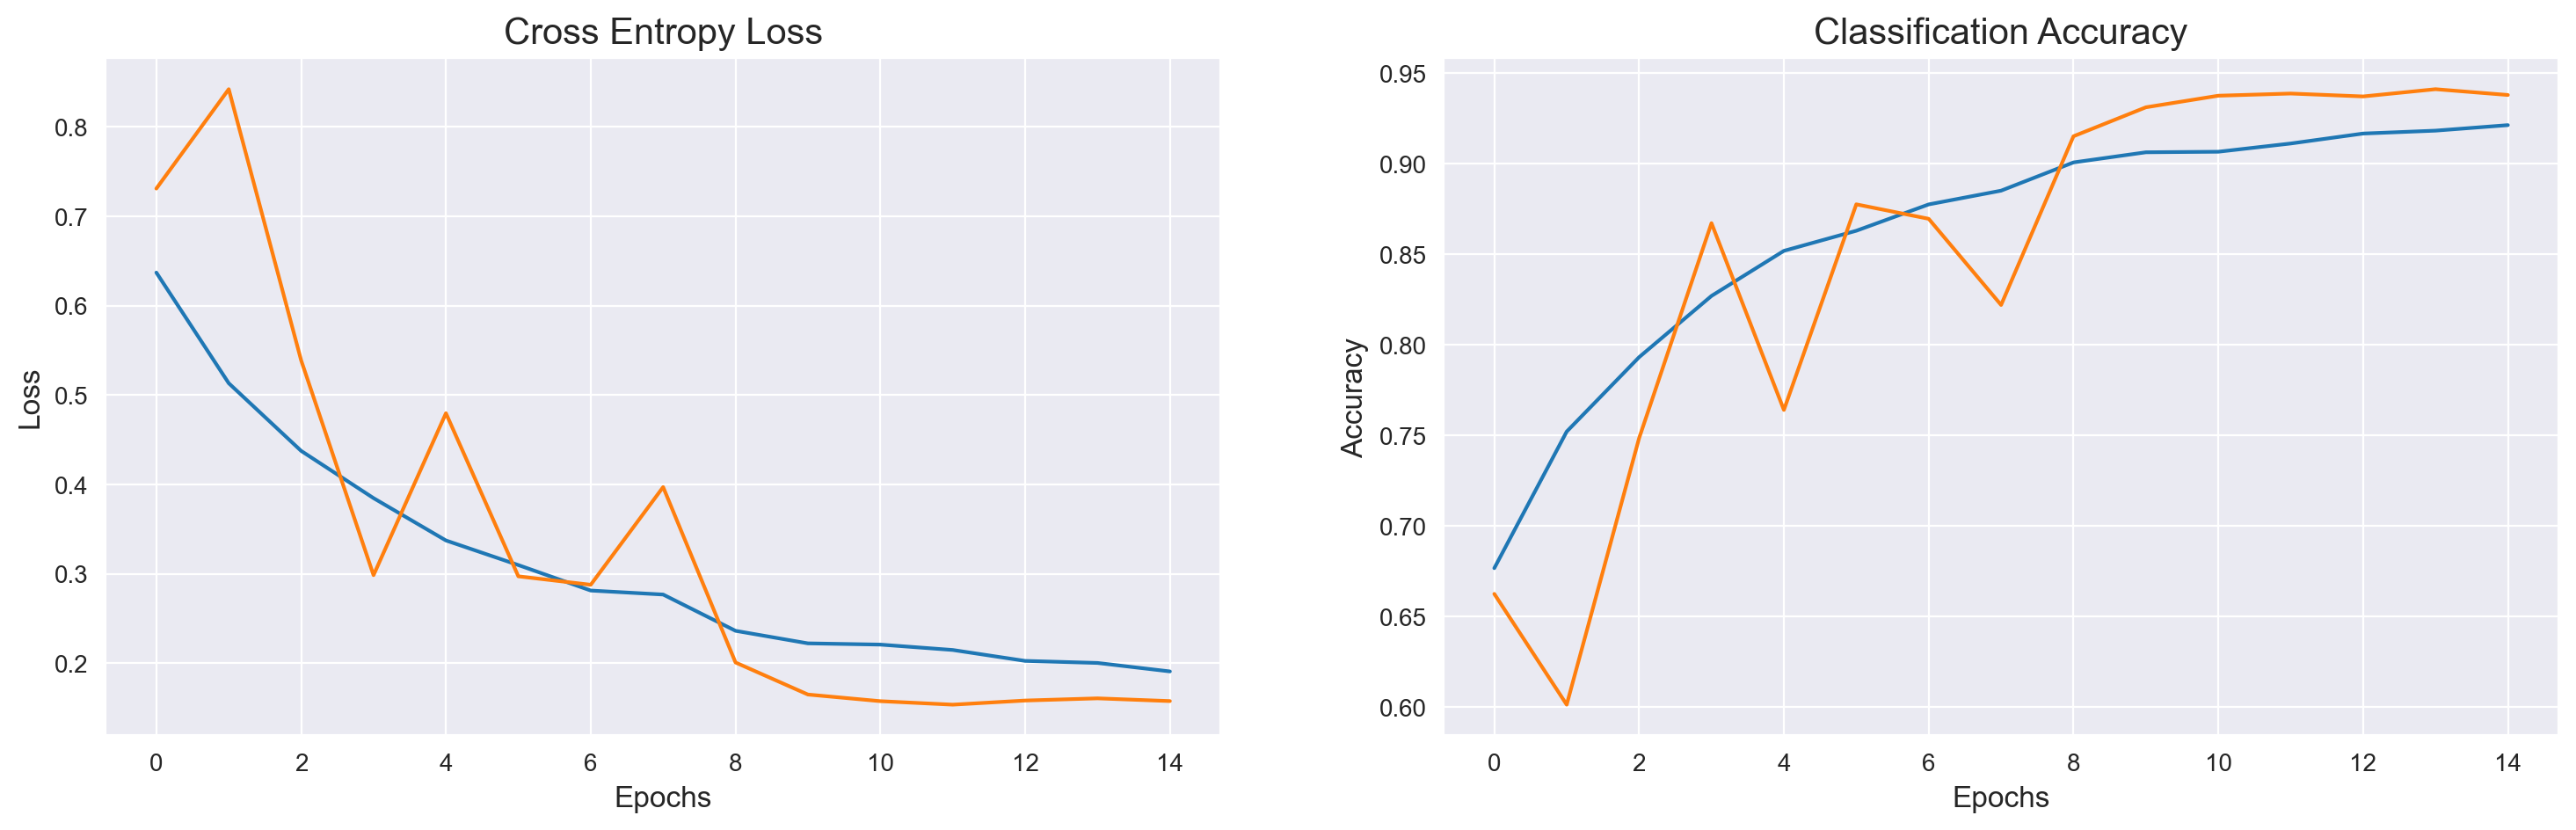

In [32]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18, 5), dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [33]:
# Evaluvate for train generator
loss, acc = model.evaluate(train_generator, batch_size=bat_size, verbose=0)

print('The accuracy of the model for training data is:', acc * 100)
print('The Loss of the model for training data is:', loss)

# Evaluvate for validation generator
loss, acc = model.evaluate(val_generator, batch_size=bat_size, verbose=0)

print('The accuracy of the model for validation data is:', acc * 100)
print('The Loss of the model for validation data is:', loss)

The accuracy of the model for training data is: 92.98999905586243
The Loss of the model for training data is: 0.17956003546714783
The accuracy of the model for validation data is: 93.87999773025513
The Loss of the model for validation data is: 0.15383853018283844


In [34]:
# prediction
result = model.predict(test_generator, batch_size=bat_size, verbose=0)

y_pred = np.argmax(result, axis=1)

y_true = test_generator.labels

# Evaluvate
loss, acc = model.evaluate(test_generator, batch_size=bat_size, verbose=0)

print('The accuracy of the model for testing data is:', acc * 100)
print('The Loss of the model for testing data is:', loss)

C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


The accuracy of the model for testing data is: 93.76000165939331
The Loss of the model for testing data is: 0.15381595492362976


In [35]:
labels = ['Cat', 'Dog']
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

         Cat       0.95      0.92      0.94      1250
         Dog       0.92      0.96      0.94      1250

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



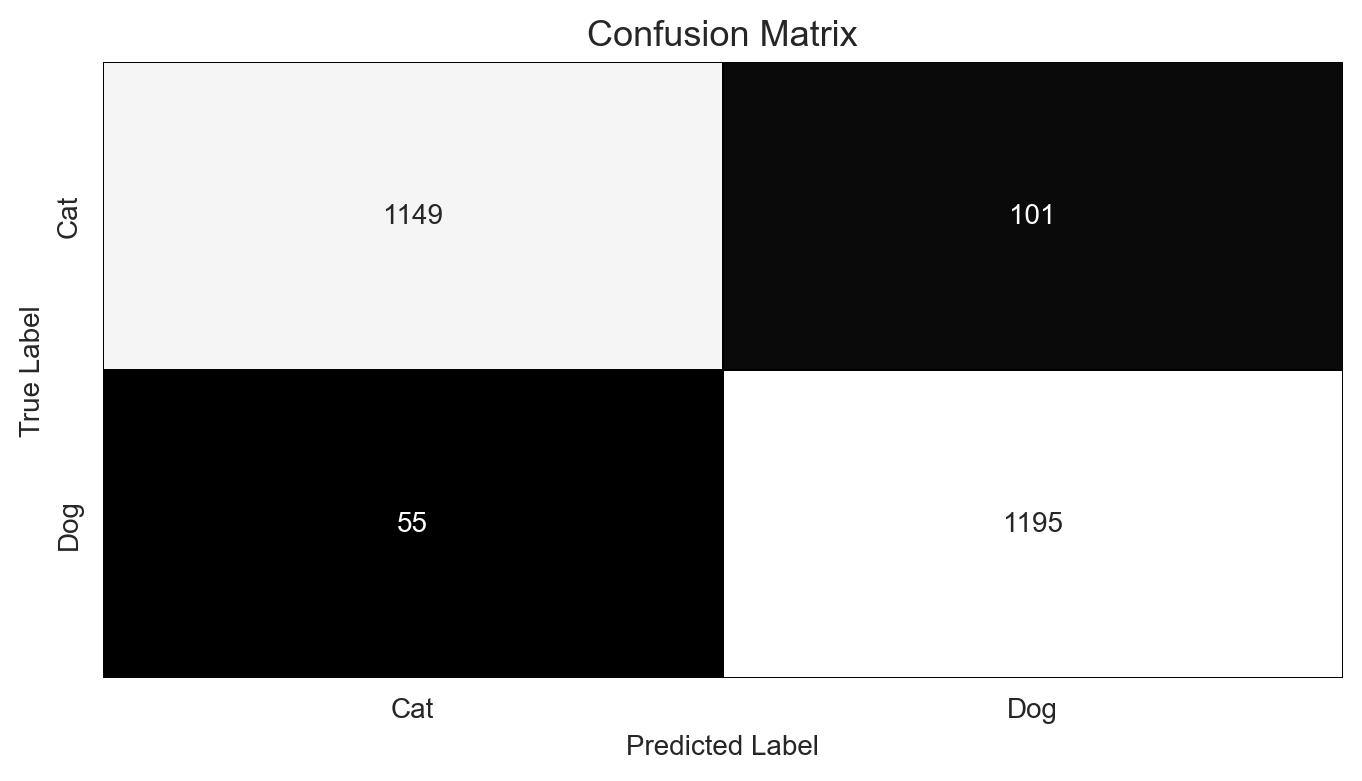

In [36]:
confusion_mtx = confusion_matrix(y_true, y_pred)

f, ax = plt.subplots(figsize=(8, 4), dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap="gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,
            cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label", fontsize=10)
plt.ylabel("True Label", fontsize=10)
plt.title("Confusion Matrix", fontsize=13)

plt.show()

In [1]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import warnings

# 忽略特定警告
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

# 定义图像尺寸和批次大小
size = (128, 128)
bat_size = 1 # 选择合适的批量大小

# 加载测试数据到DataFrame
test_dir = "kaggle/working/test1"
filenames = os.listdir(test_dir)
test_data = pd.DataFrame({"filename": filenames})

# 创建测试数据生成器
test_datagen = ImageDataGenerator(rescale=1./255)  # 根据需要添加预处理
test1_idg = test_datagen.flow_from_dataframe(
    test_data,
    directory=test_dir,
    x_col="filename",
    y_col=None,  # 我们不需要y_col，因为我们只是做预测
    class_mode=None,  # 同上
    batch_size=bat_size,
    target_size=size,
    color_mode='rgb',  # 确保颜色模式为RGB
    shuffle=False
)

# 使用模型进行预测
# 确保模型的输入层与数据生成器的输出匹配
# 假设模型的输入层期望的形状是 (None, 128, 128, 3)
test1_predict = model.predict(test1_idg, verbose=1)  # verbose=1显示进度条

# 获取预测的最大概率对应的类索引
test1_predict_argmax = np.argmax(test1_predict, axis=1)

# 将预测结果添加到test_data中
test_data['label'] = test1_predict_argmax

# 映射标签
label_mapping = {0: 'cat', 1: 'dog'}
test_data['label'] = test_data['label'].map(label_mapping)

# 查看前几行
print(test_data.head())

# 读取样本提交文件并更新预测标签
sub = pd.read_csv('dogs-vs-cats/sampleSubmission.csv', index_col='id')

# 假设sampleSubmission.csv中的id与test_data中的filename对应
# 且filename不包含文件扩展名
# 将filename转换为正确的格式
test_data['filename'] = test_data['filename'].apply(lambda x: x.split('.')[0])  # 移除文件扩展名
sub['label'] = test_data.set_index('filename')['label']

# 保存结果到CSV文件
sub.to_csv('submission.csv', index=True)

Found 12500 validated image filenames.


NameError: name 'model' is not defined

In [2]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for idx in range(10):
    image_path = os.path.join(test_dir, test_data.iloc[idx]['filename'])
    image = Image.open(image_path)
    axes[idx].imshow(image)
    axes[idx].set_title("Label: " + test_data.iloc[idx]['label'])
    axes[idx].axis('off')
plt.show()

NameError: name 'plt' is not defined